# Boxplots

(c) 2023-2024 Nick Falk, Rob Edwards

These boxplots are based on Nick's boxplot data, but this uses the "new" format taxonomy data that is the same for MGI and MinION


In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multitest import multipletests

from socket import gethostname
hostname = gethostname()
if hostname.startswith('hpc-node'):
    IN_DEEPTHOUGHT = True
    sys.path.append('..')
else:
    IN_DEEPTHOUGHT = False

In [2]:
from cf_analysis_lib import read_taxonomy, read_metadata

In [3]:
datadir = ".."
sequence_type = "MGI"
taxa = "genus"
genus_otu = read_taxonomy(datadir, sequence_type, taxa, all_taxa=True)
genus_otu.head(3)

,1068841_20180306_S,1085876_20180227_S,1128691_20171206_S,1128691_20171218_S,1128691_20180116_S,1162967_20180116_S,1282052_20180206_S,1316935_20180417_S,1447437_20171006_S,1447437_20171212_S,...,825012_20181126_S,848255_20190228_S,875028_20180115_S,877469_20190115_S,892355_20180123_S,895293_20180502_S,896213_20180427_S,913873_20180417_S,980574_20180403_S,983493_20180123_S
taxonomy,,,,,,,,,,,,,,,,,,,,,
Hadarchaeum,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Prometheoarchaeum,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.368929,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mancarchaeum,0.539042,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.906775,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Normalization/Transformation
# Square root transform
sqrt_genus = np.sqrt(genus_otu)

# Transpose the taxa table
#genus_otu2 = sqrt_genus.T
genus_otu2 = genus_otu.T
genus_otu2.head()

taxonomy,Hadarchaeum,Prometheoarchaeum,Mancarchaeum,Micrarchaeum,Nanohalobium,Odinarchaeum,Parvarchaeum,Aciduliprofundum,Sysuiplasma,Methanoplasma,...,Wulfhauvirus,Afonbuvirus,Besingivirus,Buchavirus,Buhlduvirus,Cacepaovirus,Chuhaivirus,Cohcovirus,Tredecimvirus,Hagravirus
1068841_20180306_S,0.0,0.0,0.539042,0.0,0.0,0.0,0.000000,0.539042,0.269521,0.539042,...,0.0,2.15617,18.327443,0.0,0.0,5.659946,71.692644,0.0,0.0,0.0
1085876_20180227_S,0.0,0.0,0.000000,0.0,0.0,0.0,0.283506,0.283506,0.000000,0.000000,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1128691_20171206_S,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1128691_20171218_S,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1128691_20180116_S,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [5]:
sequence_type = 'MGI'
metadata = read_metadata(datadir, sequence_type)
metadata.head(3)

,minion,MGI,pwCF_ID,Sample date,IP vs OP,Hospital,Room,Age,Age groups,Paediatric vs Adult,...,Sum of meds,Sum of antifungals,Sum of steroid + mabs,DNA_extraction_ conc,SAGC ULN,DNA Conc. (ng/ul),Index I7,Index I5,Mean_Size_BP,Total Clusters Passing Filter (Million)
NAME,,,,,,,,,,,,,,,,,,,,,
1068841_20180306_S,1068841_20180306_S,1068841_20180306_S,1068841,3/06/2018,OP,RAH,Chest Clinic 7,47,7,Adult,...,0,0,0,1.070,SAGCFN_22_01754,42.8,CGCTCATT,ATAGAGGC,417,2.8
1085876_20180227_S,NaN,1085876_20180227_S,1085876,2/27/2018,OP,RAH,Chest Clinic 6,40,6,Adult,...,1,0,0,0.132,SAGCFN_22_01828,19.0,AGCGATAG,GGCTCTGA,674,2.5
1128691_20171206_S,NaN,1128691_20171206_S,1128691,12/06/2017,IP,RAH,RAH 8E 05,47,7,Adult,...,3,0,0,1.750,SAGCFN_22_01748,33.4,TCCGGAGA,GGCTCTGA,535,4.5


In [6]:
# Merge the taxa table and metadata table by the shared row names
merged1 = pd.merge(metadata.rename(columns={'Pseudomonas':'Pseudomonas culturing'}), genus_otu2, left_index=True, right_index=True)
merged1.head()

,minion,MGI,pwCF_ID,Sample date,IP vs OP,Hospital,Room,Age,Age groups,Paediatric vs Adult,...,Wulfhauvirus,Afonbuvirus,Besingivirus,Buchavirus,Buhlduvirus,Cacepaovirus,Chuhaivirus,Cohcovirus,Tredecimvirus,Hagravirus
NAME,,,,,,,,,,,,,,,,,,,,,
1068841_20180306_S,1068841_20180306_S,1068841_20180306_S,1068841,3/06/2018,OP,RAH,Chest Clinic 7,47,7,Adult,...,0.0,2.15617,18.327443,0.0,0.0,5.659946,71.692644,0.0,0.0,0.0
1085876_20180227_S,NaN,1085876_20180227_S,1085876,2/27/2018,OP,RAH,Chest Clinic 6,40,6,Adult,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1128691_20171206_S,NaN,1128691_20171206_S,1128691,12/06/2017,IP,RAH,RAH 8E 05,47,7,Adult,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1128691_20171218_S,1128691_20171218_S,1128691_20171218_S,1128691,12/18/2017,OP,RAH,Chest Clinic 1,47,7,Adult,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1128691_20180116_S,1128691_20180116_S,1128691_20180116_S,1128691,1/16/2018,OP,RAH,Chest Clinic 4,47,7,Adult,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [7]:
# Define the culturing
culture_columns = [
    'CS_Pseudomonas aeruginosa',
    'CS_Stenophotomonas maltophilia',
    'NTM',
    'CS_Mycobacteroides abscessus',
    'CS_Mycobacterium intracellulare',
    'CS_Staphylococcus  aureus',
    'CS_Achromobacter xylosoxidans',
    'CS_Burkholderia cepacia',
    'CS_Haemophilus influenzae'
]

culture_pairs = {
    'CS_Pseudomonas aeruginosa' : 'Pseudomonas',
    'CS_Stenophotomonas maltophilia': 'Stenotrophomonas',
    'NTM' : 'Mycobacterium',
    'CS_Mycobacteroides abscessus' : 'Mycobacteroides',
    'CS_Mycobacterium intracellulare' : 'Mycobacterium',
    'CS_Staphylococcus  aureus' : 'Staphylococcus',
    'CS_Achromobacter xylosoxidans' : 'Achromobacter',
    'CS_Burkholderia cepacia' : 'Burkholderia',
    'CS_Haemophilus influenzae' : 'Haemophilus'
}



In [8]:
culture_pairs.keys()

dict_keys(['CS_Pseudomonas aeruginosa', 'CS_Stenophotomonas maltophilia', 'NTM', 'CS_Mycobacteroides abscessus', 'CS_Mycobacterium intracellulare', 'CS_Staphylococcus  aureus', 'CS_Achromobacter xylosoxidans', 'CS_Burkholderia cepacia', 'CS_Haemophilus influenzae'])

In [ ]:
# Step 2: Create Boxplots
def create_boxplot(data, culture_taxa, taxa):
    subset_data = data[data[culture_taxa].notna()]
    tx = culture_taxa.replace('CS_', '')
    plt.figure(figsize=(10, 6))
    # sns.boxplot(x=culture_taxa, y=taxa, data=subset_data, color='black', boxprops=dict(facecolor='white'))
    sns.violinplot(x=culture_taxa, y=taxa, data=subset_data, hue=culture_taxa, palette='rocket_r', alpha=0.5, legend=False, inner=None, density_norm='count', common_norm=True, cut=0)
    sns.stripplot(x=culture_taxa, y=taxa, data=subset_data, color='black', jitter=True, alpha=0.5, legend=False)
    plt.title(f"{tx} culture status and DNA sequencing reads")
    plt.xlabel("")
    plt.ylabel("DNA sequence abundance")
    plt.xticks(ticks=[0, 1], labels=["negative culture", "positive culture"])
    plt.grid(False)
    plt.tight_layout()
    plt.show()

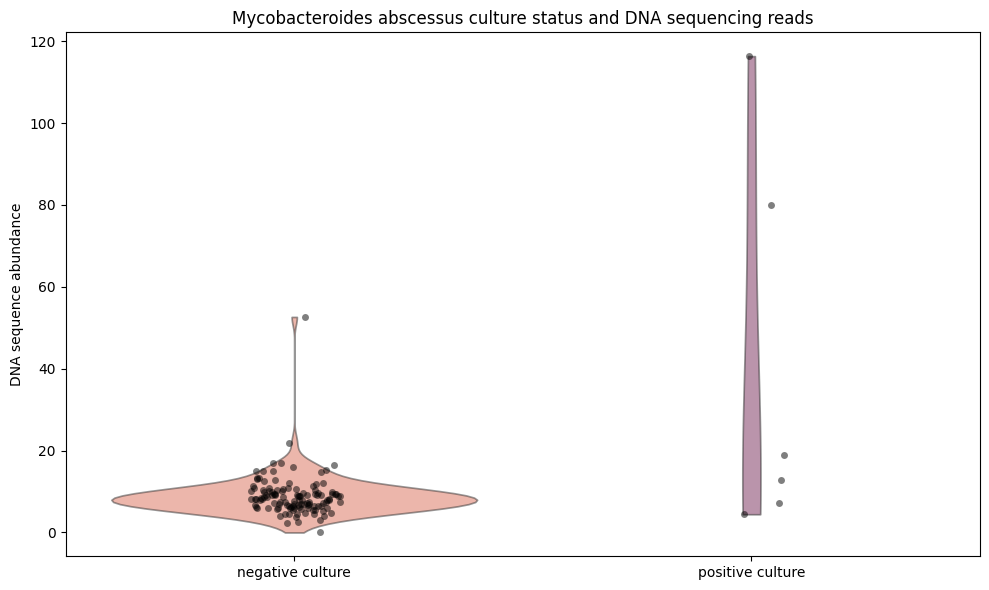

In [14]:
# Example usage
create_boxplot(merged1, "CS_Mycobacteroides abscessus", "Mycobacteroides")

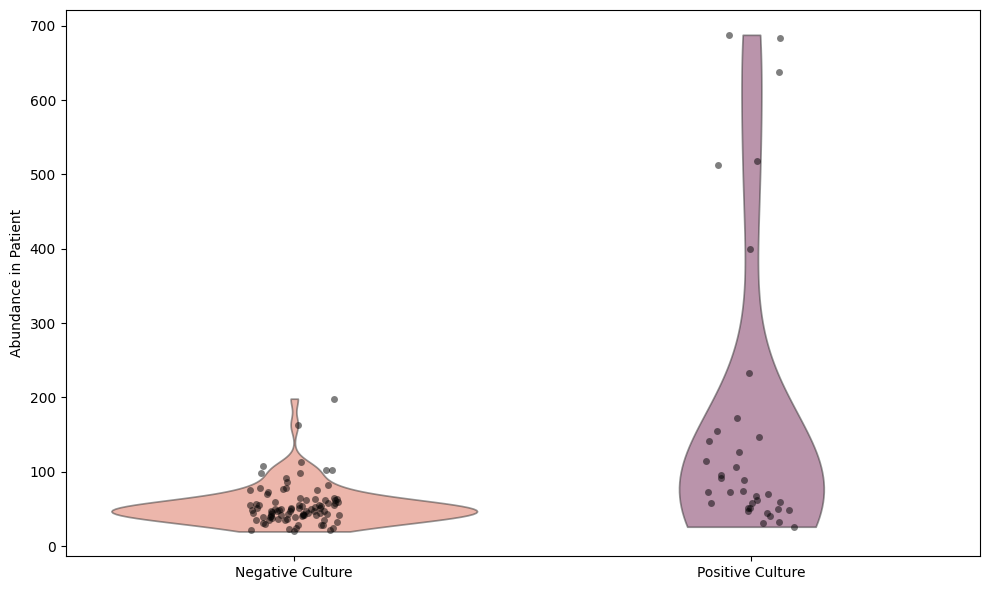

In [11]:
# Example usage
create_boxplot(merged1, "CS_Pseudomonas aeruginosa", "Pseudomonas")

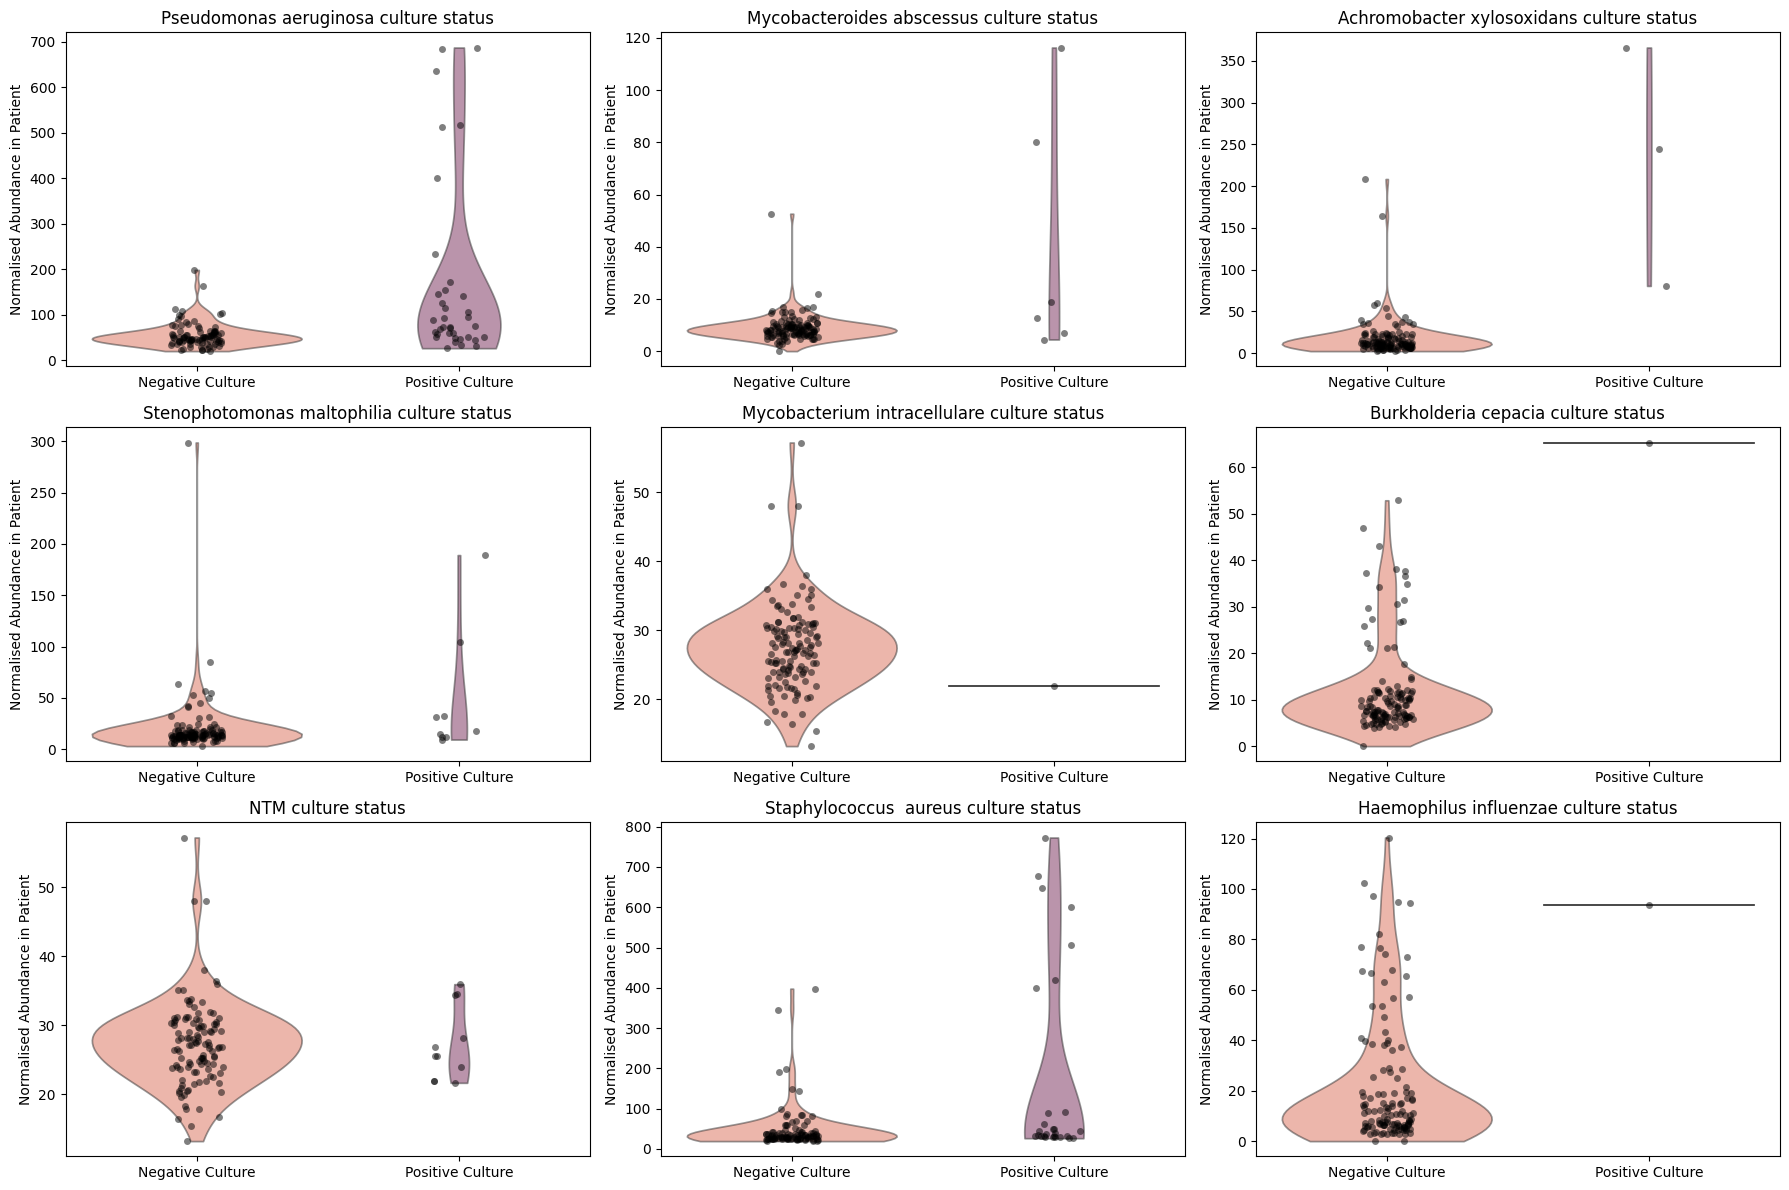

In [12]:
fig, ax = plt.subplots(figsize=(18, 12), nrows=3, ncols=3, sharex=False, sharey=False)

k = 0
for i in [0, 1, 2]:
    for j in [0, 1, 2]:
        culture_taxa = culture_columns[k]
        taxa = culture_pairs[culture_taxa]
        subset_data = merged1[merged1[culture_taxa].notna()]
        g = sns.violinplot(x=culture_taxa, y=taxa, data=subset_data, hue=culture_taxa, palette='rocket_r', alpha=0.5, ax=ax[j][i], legend=False, inner=None, density_norm='count', common_norm=True, cut=0)
        g = sns.stripplot(x=culture_taxa, y=taxa, data=subset_data, color='black', jitter=True, alpha=0.5, ax=ax[j][i], legend=False)
        g.set_xlabel("")
        g.set_ylabel("Normalised Abundance in Patient")
        g.set_xlim(-0.5, 1.5)
        g.set_xticks(ticks=[0, 1], labels=["Negative Culture", "Positive Culture"])
        g.set_title(f"{culture_taxa.replace('CS_', '')} culture status")
        k+=1
        

plt.tight_layout()
plt.show()

In [13]:
# Step 3: Additionally Stats Tests
# Perform Kruskal-Wallis Test
kruskal_stat, p_value = stats.kruskal(
    merged1.loc[merged1['CS_Pseudomonas aeruginosa'] == 0.0, 'Pseudomonas'],
    merged1.loc[merged1['CS_Pseudomonas aeruginosa'] == 1.0, 'Pseudomonas']
)
print(f'Kruskal-Wallis Test statistic: {kruskal_stat}, p-value: {p_value}')

Kruskal-Wallis Test statistic: 19.101676968864524, p-value: 1.2393594029476038e-05


In [14]:
# Calculate median
g__CS_Pseudomonas_aeruginosa_median = merged1.groupby('CS_Pseudomonas aeruginosa', observed=True)['Pseudomonas'].median()
print(g__CS_Pseudomonas_aeruginosa_median)

CS_Pseudomonas aeruginosa
0    49.864635
1    73.420695
Name: Pseudomonas, dtype: float64


In [15]:
# Filter to get the threshold value for hits in the "0" grouping
threshold_CS_Pseudomonas_aeruginosa = g__CS_Pseudomonas_aeruginosa_median.loc[1]
print(threshold_CS_Pseudomonas_aeruginosa)

73.42069496764547


In [16]:
# Find row names where the value is above the threshold
above_threshold_rownames_CS_Pseudomonas_aeruginosa = merged1[
    (merged1['CS_Pseudomonas aeruginosa'] == 0) &
    (merged1['Pseudomonas'] > threshold_CS_Pseudomonas_aeruginosa)
].index.tolist()
# Print the row names
print(above_threshold_rownames_CS_Pseudomonas_aeruginosa)

['1586713_20180309_S', '1651490_20171010_S', '1651490_20180206_S', '676138_20171001_S', '698564_20180215_S', '698917_20171207_S', '698917_20180119_S', '698917_20180128_S', '698917_20180329_S', '752797_20170918_S', '768745_20190228_BAL', '770560_20190109_S', '825012_20181120_S', '877469_20190115_S', '896213_20180427_S', '913873_20180417_S']


In [17]:
# Save results to CSV
pd.DataFrame(above_threshold_rownames_CS_Pseudomonas_aeruginosa).to_csv("CS_Pseudomonas.aeruginosa.csv", index=False)

In [18]:
culture_columns = [
    'CS_Achromobacter xylosoxidans',
    'CS_Acremonium species',
    'CS_Aspergillus flavus',
    'CS_Aspergillus fumigatus',
    'CS_Aspergillus nidulans',
    'CS_Burkholderia cepacia',
    'CS_Candida albicans',
    'CS_Haemophilus influenzae',
    'CS_Inquilinus limosus',
    'CS_Lomentospora prolificans',
    'CS_MDR_Pseudomonas aeruginosa',
    'CS_Mycobacterium intracellulare',
    'CS_Mycobacteroides abscessus',
    'CS_Mycolicibacter terrae',
    'CS_mucoid',
    'CS_non-mucoid',
    'CS_Penicillium',
    'CS_Pseudomonas aeruginosa',
    'CS_Scedosporium apiospermum.1',
    'CS_Staphylococcus  aureus',
    'CS_Stenophotomonas maltophilia'
]

culture_pairs = {
    'CS_Achromobacter xylosoxidans': 'Achromobacter',
    'CS_Acremonium species': 'Acremonium',
    'CS_Aspergillus flavus': 'Aspergillus',
    'CS_Aspergillus fumigatus': 'Aspergillus',
    'CS_Aspergillus nidulans': 'Aspergillus',
    'CS_Burkholderia cepacia': 'Burkholderia',
    'CS_Candida albicans': 'Candida',
    'CS_Haemophilus influenzae': 'Haemophilus',
    'CS_Inquilinus limosus': 'Inquilinus',
    'CS_Lomentospora prolificans': 'Lomentospora',
    'CS_MDR_Pseudomonas aeruginosa': 'Pseudomonas',
    'CS_Mycobacterium intracellulare': 'Mycobacterium',
    'CS_Mycobacteroides abscessus': 'Mycobacteroides',
    'CS_Mycolicibacter terrae': 'Mycolicibacter',
    'CS_mucoid': 'Pseudomonas',
    'CS_non-mucoid': 'Pseudomonas',
    'CS_Penicillium': 'Penicillium',
    'CS_Pseudomonas aeruginosa': 'Pseudomonas',
    'CS_Scedosporium apiospermum.1': 'Scedosporium',
    'CS_Staphylococcus  aureus': 'Staphylococcus',
    'CS_Stenophotomonas maltophilia': 'Stenotrophomonas'
}

In [19]:
for c in merged1.columns:
    if c.startswith('Asp'):
        print(c)

Aspergillus
Asparagus


Acremonium not found


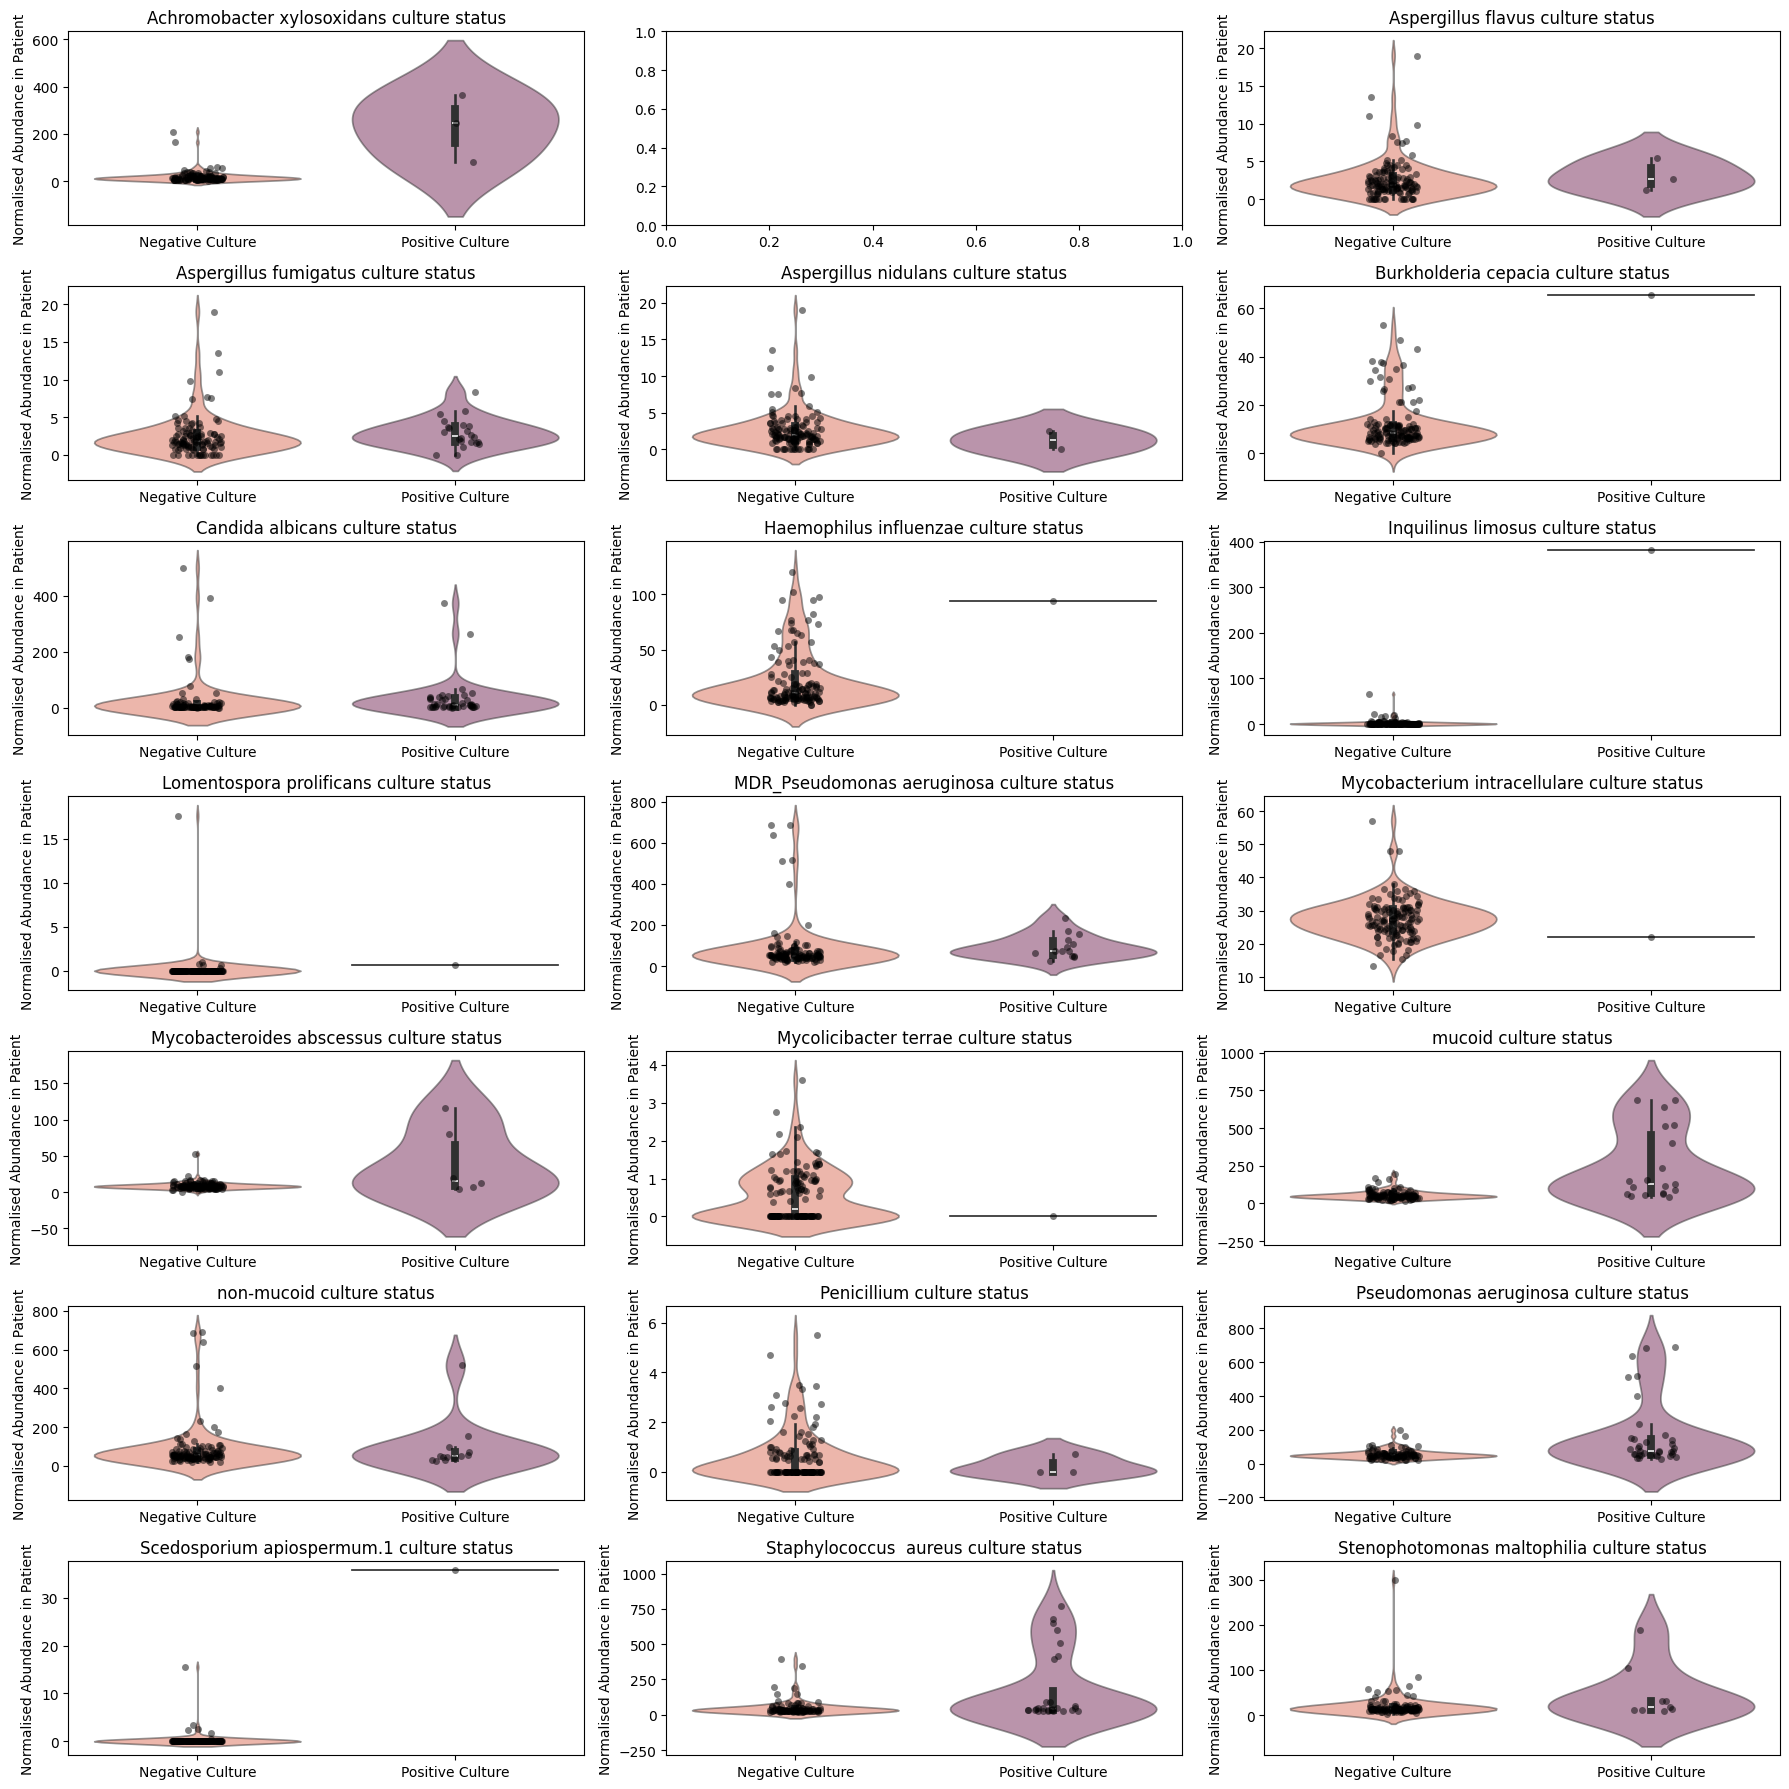

In [20]:
nrows = len(culture_columns)//3
fig, ax = plt.subplots(figsize=(18, 18), nrows=nrows, ncols=3, sharex=False, sharey=False)

for j in range(nrows):
    for i in 0,1,2:
        k = (3*j)+i
        if k >= len(culture_columns):
            continue
        culture_taxa = culture_columns[k]
        taxa = culture_pairs[culture_taxa]
        if culture_taxa not in merged1:
            print(f"{culture_taxa} not found", file=sys.stderr)
            continue
        if taxa not in merged1:
            print(f"{taxa} not found", file=sys.stderr)
            continue
        subset_data = merged1[merged1[culture_taxa].notna()]
        g = sns.violinplot(x=culture_taxa, y=taxa, data=subset_data, hue=culture_taxa, palette='rocket_r', alpha=0.5, ax=ax[j][i], legend=False)
        g = sns.stripplot(x=culture_taxa, y=taxa, data=subset_data, color='black', jitter=True, alpha=0.5, ax=ax[j][i], legend=False)
        g.set_xlabel("")
        g.set_ylabel("Normalised Abundance in Patient")
        g.set_xlim(-0.5, 1.5)
        g.set_xticks(ticks=[0, 1], labels=["Negative Culture", "Positive Culture"])
        g.set_title(f"{culture_taxa.replace('CS_', '')} culture status")
        

plt.tight_layout()
plt.show()

In [21]:
merged1

,minion,MGI,pwCF_ID,Sample date,IP vs OP,Hospital,Room,Age,Age groups,Paediatric vs Adult,...,Wulfhauvirus,Afonbuvirus,Besingivirus,Buchavirus,Buhlduvirus,Cacepaovirus,Chuhaivirus,Cohcovirus,Tredecimvirus,Hagravirus
NAME,,,,,,,,,,,,,,,,,,,,,
1068841_20180306_S,1068841_20180306_S,1068841_20180306_S,1068841,3/06/2018,OP,RAH,Chest Clinic 7,47,7,Adult,...,0.0,1.46839,4.281056,0.0,0.0,2.379064,8.467151,0.0,0.0,0.0
1085876_20180227_S,NaN,1085876_20180227_S,1085876,2/27/2018,OP,RAH,Chest Clinic 6,40,6,Adult,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1128691_20171206_S,NaN,1128691_20171206_S,1128691,12/06/2017,IP,RAH,RAH 8E 05,47,7,Adult,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1128691_20171218_S,1128691_20171218_S,1128691_20171218_S,1128691,12/18/2017,OP,RAH,Chest Clinic 1,47,7,Adult,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1128691_20180116_S,1128691_20180116_S,1128691_20180116_S,1128691,1/16/2018,OP,RAH,Chest Clinic 4,47,7,Adult,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895293_20180502_S,895293_20180502_S,895293_20180502_S,895293,5/02/2018,OP,RAH,TMO Lounge,47,7,Adult,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
896213_20180427_S,NaN,896213_20180427_S,896213,4/27/2018,OP,WCH,Level 6 Treatment,6,1,Paediatric,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
913873_20180417_S,NaN,913873_20180417_S,913873,4/17/2018,IP,WCH,Cassia 17,6,1,Paediatric,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [22]:
culture_groups = {x:[] for x in culture_pairs.values()}
for c in culture_pairs:
    culture_groups[culture_pairs[c]].append(c)
culture_groups.pop('Acremonium')
culture_groups

{'Achromobacter': ['CS_Achromobacter xylosoxidans'],
 'Aspergillus': ['CS_Aspergillus flavus',
  'CS_Aspergillus fumigatus',
  'CS_Aspergillus nidulans'],
 'Burkholderia': ['CS_Burkholderia cepacia'],
 'Candida': ['CS_Candida albicans'],
 'Haemophilus': ['CS_Haemophilus influenzae'],
 'Inquilinus': ['CS_Inquilinus limosus'],
 'Lomentospora': ['CS_Lomentospora prolificans'],
 'Pseudomonas': ['CS_MDR_Pseudomonas aeruginosa',
  'CS_mucoid',
  'CS_non-mucoid',
  'CS_Pseudomonas aeruginosa'],
 'Mycobacterium': ['CS_Mycobacterium intracellulare'],
 'Mycobacteroides': ['CS_Mycobacteroides abscessus'],
 'Mycolicibacter': ['CS_Mycolicibacter terrae'],
 'Penicillium': ['CS_Penicillium'],
 'Scedosporium': ['CS_Scedosporium apiospermum.1'],
 'Staphylococcus': ['CS_Staphylococcus  aureus'],
 'Stenotrophomonas': ['CS_Stenophotomonas maltophilia']}

In [23]:
print(len(culture_groups.keys()))

15


For each row per person, I want to average the column called 'Aspergillus', and then I want to test if any of the categorical columns 'CS_Aspergillus flavus',  'CS_Aspergillus fumigatus', 'CS_Aspergillus nidulans' contain a 1, regardless of the data in which they were sampled. 

1. Average the 'Aspergillus' column for each person.
2. Create a 'Culture Status' column that is 1 if any of the specified categorical columns contain a 1, otherwise 0.
3. Generate a new DataFrame with one row per person, including the average 'Aspergillus' value and the new 'Culture Status' column.

*ChatGPT prompt:*

Hi Chatty, In my data frame, I have multiple rows per person (depending on when the samples were taken). For each row per person, I want to average the column called 'Aspergillus', and then I want to test if any of the categorical columns 'CS_Aspergillus flavus',  'CS_Aspergillus fumigatus', 'CS_Aspergillus nidulans' contain a 1, regardless of the data in which they were sampled. This should generate a new data frame with one row per person, and then just the average Aspergillus value, and another single column for "Culture Status" that is 1 if any of 'CS_Aspergillus flavus',  'CS_Aspergillus fumigatus', 'CS_Aspergillus nidulans' contain a 1.

In [24]:
wanted = 'Aspergillus'
tmpdf = merged1[['pwCF_ID', wanted] + culture_groups[wanted]]
tmpdf[culture_groups[wanted]] = tmpdf[culture_groups[wanted]].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
tmpgrouped = tmpdf.groupby('pwCF_ID')
tmpgrouped_avg = tmpgrouped[wanted].mean()
culture_status = tmpgrouped[culture_groups[wanted]].any()
culture_status['Culture_Status'] = culture_status.any(axis=1).astype(int)
aggregated_df = pd.DataFrame({
    wanted: tmpgrouped_avg,
    'Culture_Status': culture_status['Culture_Status']
})

aggregated_df

/local/edwa0468/2633017/ipykernel_3360732/3036340370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf[culture_groups[wanted]] = tmpdf[culture_groups[wanted]].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)


,Aspergillus,Culture_Status
pwCF_ID,,
623361,3.569311,1
634207,1.947331,1
639354,2.056125,0
642660,0.847012,0
650003,6.055286,1
...,...,...
1664053,1.723510,0
1690154,2.090538,1
1834617,1.722126,0


In [25]:
def aggregate_culture_status_and_counts(mergeddf, wanted, cs_cols):
    tmpdf = mergeddf[['pwCF_ID', wanted] + cs_cols]
    tmpdf.loc[:,cs_cols] = tmpdf.loc[:,cs_cols].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
    tmpgrouped = tmpdf.groupby('pwCF_ID')
    tmpgrouped_avg = tmpgrouped[wanted].mean()
    culture_status = tmpgrouped[culture_groups[wanted]].any()
    culture_status['Culture_Status'] = culture_status.any(axis=1).astype(int)
    aggregated_df = pd.DataFrame({
        wanted: tmpgrouped_avg,
        'Culture_Status': culture_status['Culture_Status']
    })
    return aggregated_df

wanted = 'Pseudomonas'
aggregate_culture_status_and_counts(merged1, wanted, culture_groups[wanted])


,Pseudomonas,Culture_Status
pwCF_ID,,
623361,59.583614,1
634207,25.905531,0
639354,512.480680,1
642660,70.617604,0
650003,37.093308,1
...,...,...
1664053,95.324306,1
1690154,50.839210,1
1834617,47.871212,0


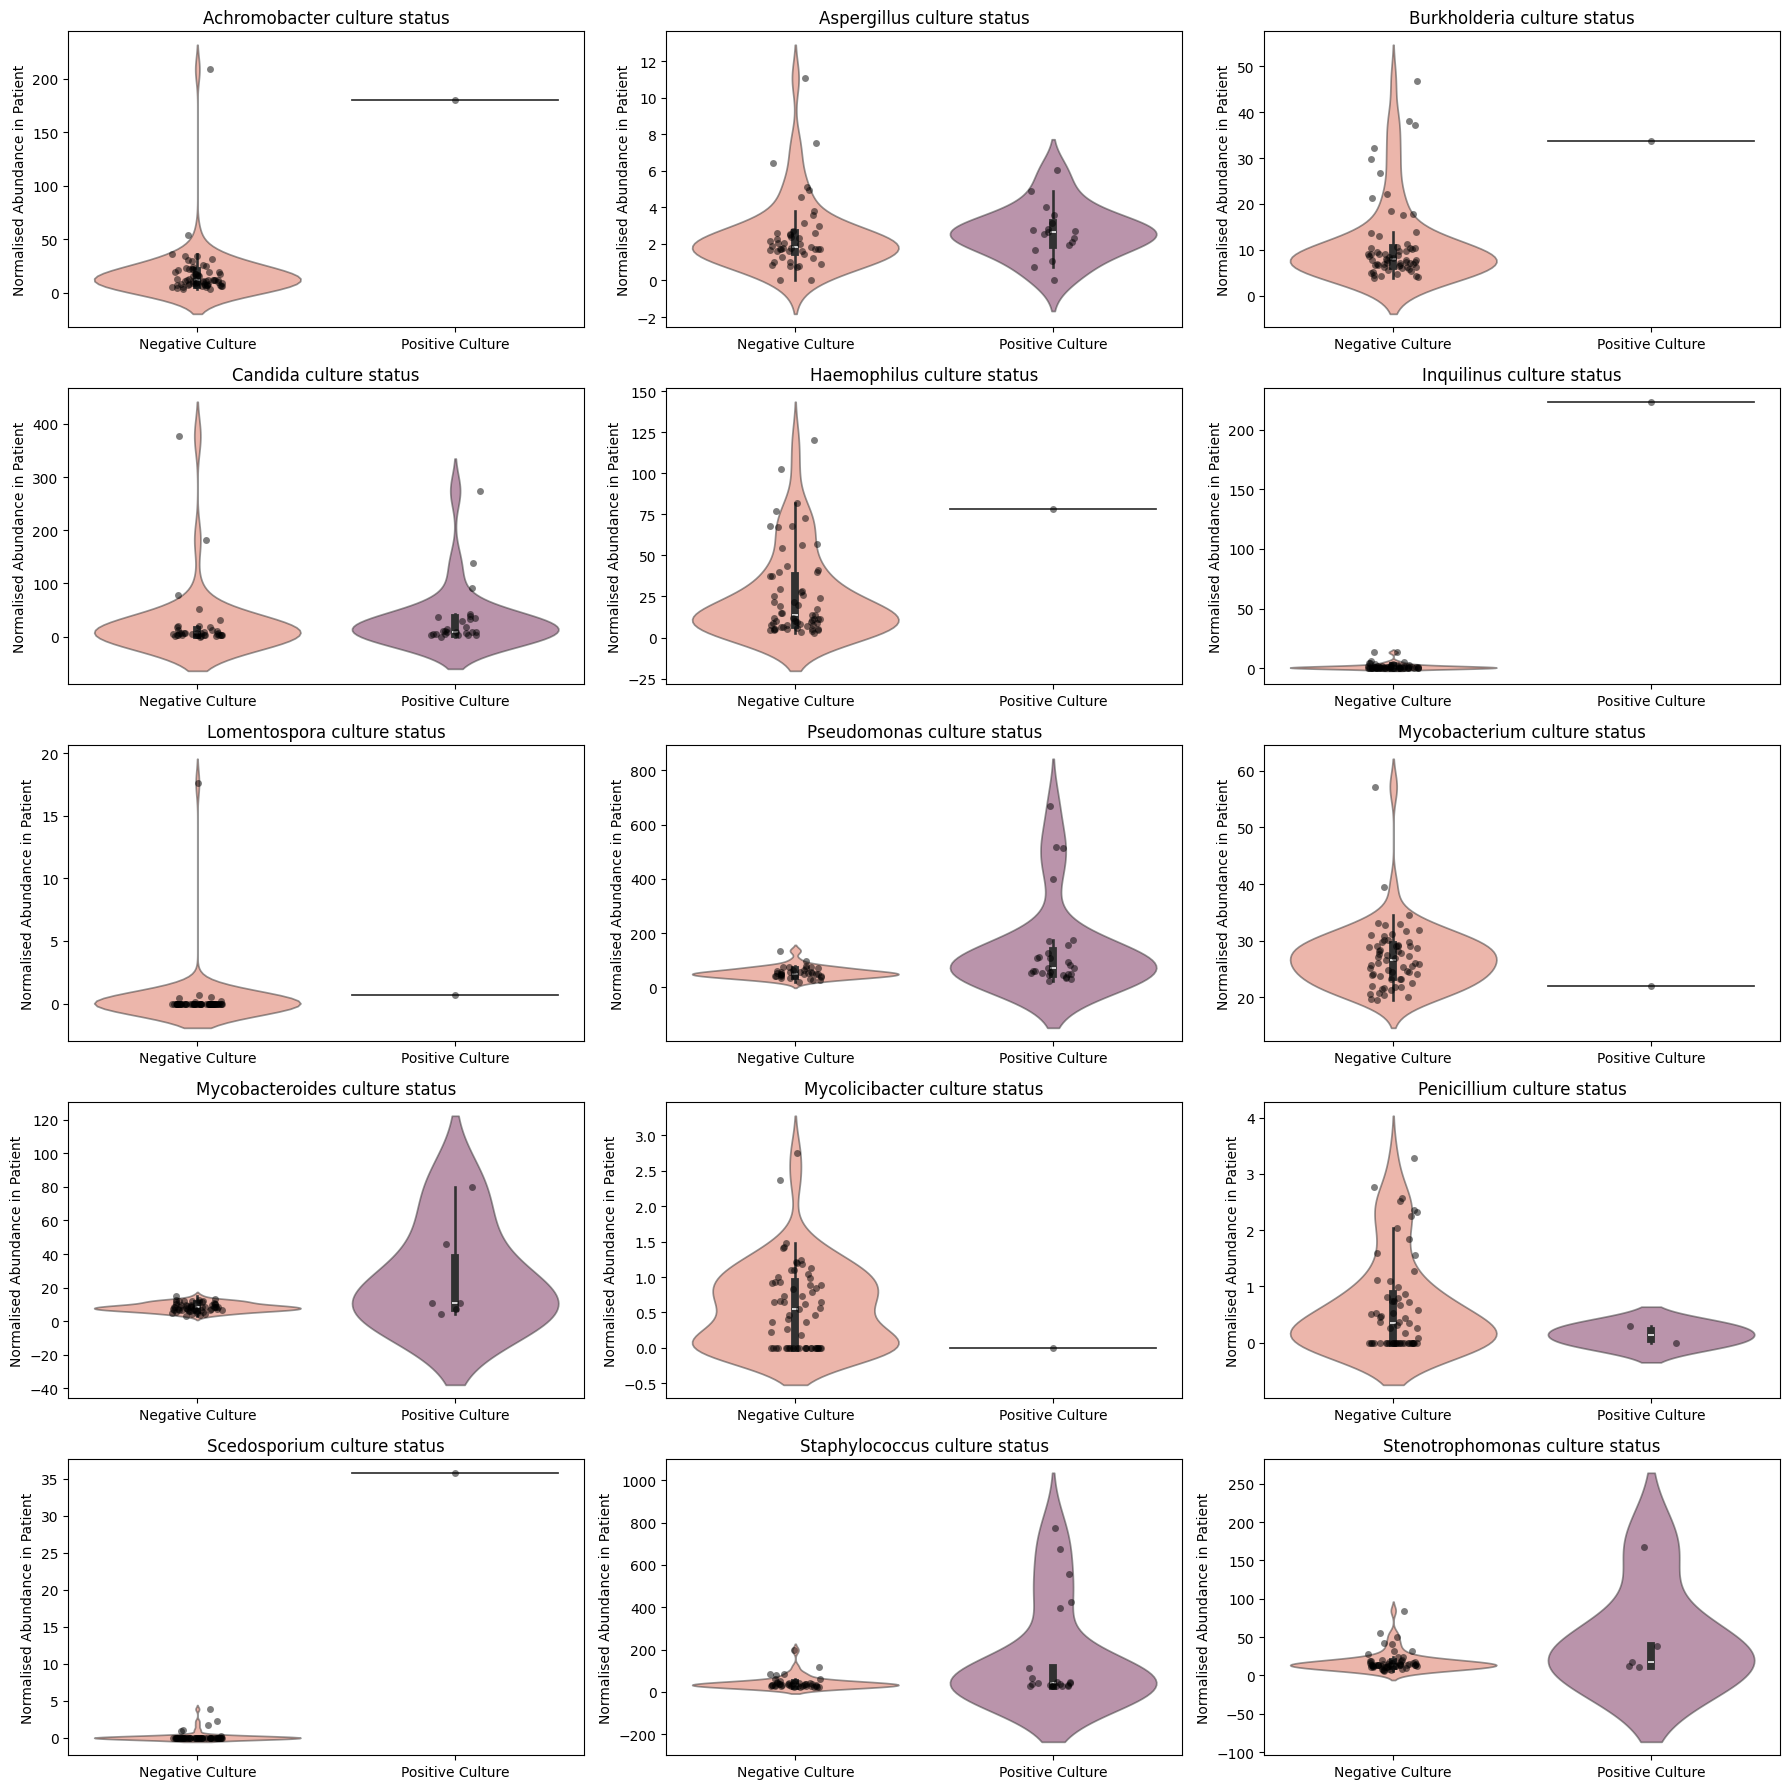

In [26]:
wanteds = list(culture_groups.keys())
nrows = len(wanteds)//3
fig, ax = plt.subplots(figsize=(18, 18), nrows=nrows, ncols=3, sharex=False, sharey=False)

for j in range(nrows):
    for i in 0,1,2:
        k = (3*j)+i
        if k >= len(wanteds):
            continue
        wanted = wanteds[k]
        subset_data = aggregate_culture_status_and_counts(merged1, wanted, culture_groups[wanted])
        g = sns.violinplot(x='Culture_Status', y=wanted, data=subset_data, hue='Culture_Status', palette='rocket_r', alpha=0.5, ax=ax[j][i], legend=False)
        g = sns.stripplot(x='Culture_Status', y=wanted, data=subset_data, color='black', jitter=True, alpha=0.5, ax=ax[j][i], legend=False)
        g.set_xlabel("")
        g.set_ylabel("Normalised Abundance in Patient")
        g.set_xlim(-0.5, 1.5)
        g.set_xticks(ticks=[0, 1], labels=["Negative Culture", "Positive Culture"])
        g.set_title(f"{wanted} culture status")
        

plt.tight_layout()
plt.savefig(os.path.join("img", 'aggregate_culture_status.png'))
plt.show()

In [27]:
culture_groups

{'Achromobacter': ['CS_Achromobacter xylosoxidans'],
 'Aspergillus': ['CS_Aspergillus flavus',
  'CS_Aspergillus fumigatus',
  'CS_Aspergillus nidulans'],
 'Burkholderia': ['CS_Burkholderia cepacia'],
 'Candida': ['CS_Candida albicans'],
 'Haemophilus': ['CS_Haemophilus influenzae'],
 'Inquilinus': ['CS_Inquilinus limosus'],
 'Lomentospora': ['CS_Lomentospora prolificans'],
 'Pseudomonas': ['CS_MDR_Pseudomonas aeruginosa',
  'CS_mucoid',
  'CS_non-mucoid',
  'CS_Pseudomonas aeruginosa'],
 'Mycobacterium': ['CS_Mycobacterium intracellulare'],
 'Mycobacteroides': ['CS_Mycobacteroides abscessus'],
 'Mycolicibacter': ['CS_Mycolicibacter terrae'],
 'Penicillium': ['CS_Penicillium'],
 'Scedosporium': ['CS_Scedosporium apiospermum.1'],
 'Staphylococcus': ['CS_Staphylococcus  aureus'],
 'Stenotrophomonas': ['CS_Stenophotomonas maltophilia']}

In [28]:

culture_status['Culture_Status'] 

pwCF_ID
623361     1
634207     1
639354     0
642660     0
650003     1
          ..
1664053    0
1690154    1
1834617    0
1845116    0
1862551    0
Name: Culture_Status, Length: 64, dtype: int64